# `findiff` tutorial

Homesite: https://github.com/maroba/findiff



In [1]:
import matplotlib.pyplot as plt
import numpy as np
from findiff import (
    Coef,
    Coefficient,
    Curl,
    Divergence,
    FinDiff,
    Gradient,
    Laplacian,
    coefficients,
)
from findiff.stencils import Stencil
from IPython.display import YouTubeVideo
from matplotlib.lines import Line2D

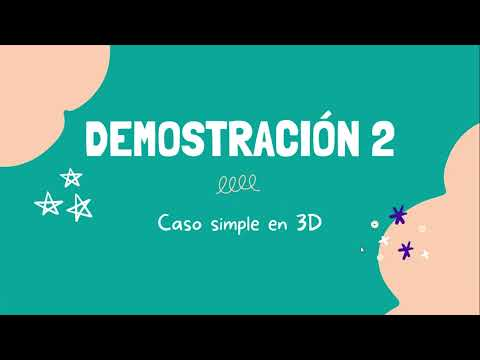

In [2]:
YouTubeVideo("1Wfv4wjI1lk")

In [3]:
x, dx = np.linspace(start=-np.pi, stop=np.pi, num=100, retstep=True)

In [4]:
f = np.sin(x)

In [5]:
d_dx = FinDiff(0, dx)

In [6]:
df_dx = d_dx(f)

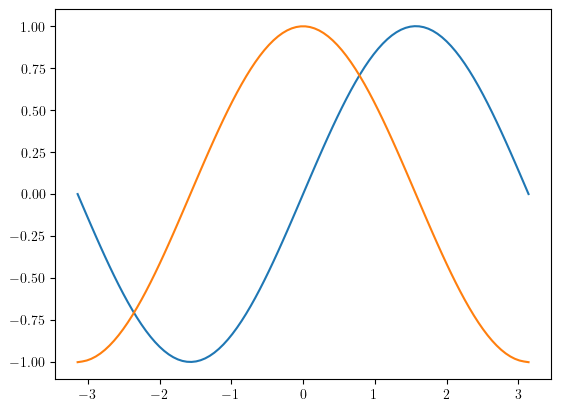

In [7]:
plt.plot(x, f)
plt.plot(x, df_dx)

In [8]:
x, dx = np.linspace(start=-1, stop=1, num=21, retstep=True)
Coef(x) * FinDiff(0, dx, 2)

In [9]:
coefficients(deriv=1, acc=2)

{'center': {'coefficients': array([-0.5,  0. ,  0.5]),
  'offsets': array([-1,  0,  1]),
  'accuracy': 2},
 'forward': {'coefficients': array([-1.5,  2. , -0.5]),
  'offsets': array([0, 1, 2]),
  'accuracy': 2},
 'backward': {'coefficients': array([ 0.5, -2. ,  1.5]),
  'offsets': array([-2, -1,  0]),
  'accuracy': 2}}

In [10]:
x, dx = np.linspace(start=0, stop=6, num=7, retstep=True)
d2_dx2 = FinDiff(0, dx, 2)
u = x**2

mat = d2_dx2.matrix(u.shape)  # this method returns a scipy sparse matrix
print(mat.toarray())

[[ 2. -5.  4. -1.  0.  0.  0.]
 [ 1. -2.  1.  0.  0.  0.  0.]
 [ 0.  1. -2.  1.  0.  0.  0.]
 [ 0.  0.  1. -2.  1.  0.  0.]
 [ 0.  0.  0.  1. -2.  1.  0.]
 [ 0.  0.  0.  0.  1. -2.  1.]
 [ 0.  0.  0. -1.  4. -5.  2.]]


In [11]:
x, dx = np.linspace(start=0, stop=1, num=101, retstep=True)
y, dy = np.linspace(start=0, stop=1, num=101, retstep=True)

In [12]:
X, Y = np.meshgrid(x, y, indexing="ij")

In [13]:
f = X**3 + Y**3

In [14]:
laplacian = FinDiff(0, dx, 2) + FinDiff(1, dy, 2)

In [15]:
stencils = laplacian.stencil(f.shape)

In [16]:
stencils.apply(f, (100, 100))  # evaluate at f[100, 100]

12.000000000029104

In [17]:
offsets = [(0, 0), (1, 1), (-1, -1), (1, -1), (-1, 1)]  # x-shaped offsets
stencil = Stencil(offsets, {(2, 0): 1, (0, 2): 1})

In [18]:
stencil

{(0, 0): -2.0, (1, 1): 0.5, (-1, -1): 0.5, (1, -1): 0.5, (-1, 1): 0.5}

In [19]:
x, dx = np.linspace(start=0, stop=10, num=100, retstep=True)
f = np.sin(x)
g = np.cos(x)

In [20]:
d2_dx2 = FinDiff(0, dx, 2)

In [21]:
result_f = d2_dx2(f)
result_g = d2_dx2(g)

In [22]:
coefficients(deriv=2, acc=2)

{'center': {'coefficients': array([ 1., -2.,  1.]),
  'offsets': array([-1,  0,  1]),
  'accuracy': 2},
 'forward': {'coefficients': array([ 2., -5.,  4., -1.]),
  'offsets': array([0, 1, 2, 3]),
  'accuracy': 2},
 'backward': {'coefficients': array([-1.,  4., -5.,  2.]),
  'offsets': array([-3, -2, -1,  0]),
  'accuracy': 2}}

In [23]:
coefficients(deriv=2, acc=10)

{'center': {'coefficients': array([ 3.17460317e-04, -4.96031746e-03,  3.96825397e-02, -2.38095238e-01,
          1.66666667e+00, -2.92722222e+00,  1.66666667e+00, -2.38095238e-01,
          3.96825397e-02, -4.96031746e-03,  3.17460317e-04]),
  'offsets': array([-5, -4, -3, -2, -1,  0,  1,  2,  3,  4,  5]),
  'accuracy': 10},
 'forward': {'coefficients': array([   7.56163106,  -44.43733488,  138.59338192, -295.52014839,
          457.03027109, -521.11394092,  439.39497337, -271.26223908,
          119.41384033,  -35.55163256,    6.42373843,   -0.53254037]),
  'offsets': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
  'accuracy': 1},
 'backward': {'coefficients': array([  -0.53253968,    6.42373016,  -35.55158728,  119.41369042,
         -271.26190464,  439.39444426, -521.11333313,  457.02976175,
         -295.51984119,  138.59325394,  -44.43730158,    7.56162698]),
  'offsets': array([-11, -10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0]),
  'accuracy': 7}}

In [24]:
d2_dx2 = FinDiff(0, dx, 2, acc=10)
result = d2_dx2(f)

In [25]:
x, dx = np.linspace(start=0, stop=10, num=100, retstep=True)
y, dy = np.linspace(start=0, stop=10, num=100, retstep=True)
z, dz = np.linspace(start=0, stop=10, num=100, retstep=True)
X, Y, Z = np.meshgrid(x, y, z, indexing="ij")
f = np.sin(X) * np.cos(Y) * np.sin(Z)

In [26]:
d_dx = FinDiff(0, dx)
d_dz = FinDiff(2, dz)

In [27]:
d3_dx2dy = FinDiff((0, dx, 2), (1, dy))
result = d3_dx2dy(f)

In [28]:
linear_op = FinDiff(0, dx, 2) + 2 * FinDiff((0, dx), (1, dy)) + FinDiff(1, dy, 2)

In [29]:
linear_op = Coefficient(X) * FinDiff(0, dx) + Coefficient(Y**2) * FinDiff(1, dy)

In [30]:
result = linear_op(f)

In [31]:
x, dx = np.linspace(start=0, stop=10, num=100, retstep=True)
y, dy = np.linspace(start=0, stop=10, num=100, retstep=True)
z, dz = np.linspace(start=0, stop=10, num=100, retstep=True)
X, Y, Z = np.meshgrid(x, y, z, indexing="ij")
f = np.sin(X) * np.cos(Y) * np.sin(Z)

In [32]:
f.shape

(100, 100, 100)

In [33]:
grad = Gradient(h=[dx, dy, dz])
grad_f = grad(f)

In [34]:
grad_f.shape

(3, 100, 100, 100)

In [35]:
laplace = Laplacian(h=[dx, dy, dz])
laplace_f = laplace(f)
laplace_f.shape

(100, 100, 100)

In [36]:
g = np.array([f, 2 * f, 3 * f])
g.shape

(3, 100, 100, 100)

In [37]:
div = Divergence(h=[dx, dy, dz])
div_g = div(g)
div_g.shape

(100, 100, 100)

In [38]:
curl = Curl(h=[dx, dy, dz])
curl_g = curl(g)
curl_g.shape

(3, 100, 100, 100)

In [39]:
x, dx = np.linspace(start=-5, stop=5, num=100, retstep=True)
y, dy = np.linspace(start=-5, stop=5, num=100, retstep=True)
X, Y = np.meshgrid(x, y, indexing="ij")
f = X**2 + Y**2

In [40]:
laplace = Laplacian(h=[dx, dy])
laplace_f = laplace(f)

In [41]:
laplace_f

array([[4., 4., 4., ..., 4., 4., 4.],
       [4., 4., 4., ..., 4., 4., 4.],
       [4., 4., 4., ..., 4., 4., 4.],
       ...,
       [4., 4., 4., ..., 4., 4., 4.],
       [4., 4., 4., ..., 4., 4., 4.],
       [4., 4., 4., ..., 4., 4., 4.]])

In [42]:
r, dr = np.linspace(start=0.1, stop=10, num=100, retstep=True)
phi, dphi = np.linspace(start=0, stop=2 * np.pi, num=100, endpoint=False, retstep=True)
R, Phi = np.meshgrid(r, phi, indexing="ij")
f_polar = R**2

In [43]:
f - f_polar

array([[ 49.99      ,  48.99010203,  48.01061014, ...,  48.01061014,
         48.99010203,  49.99      ],
       [ 48.96010203,  47.96020406,  46.98071217, ...,  46.98071217,
         47.96020406,  48.96010203],
       [ 47.93061014,  46.93071217,  45.95122028, ...,  45.95122028,
         46.93071217,  47.93061014],
       ...,
       [-48.01938986, -49.01928783, -49.99877972, ..., -49.99877972,
        -49.01928783, -48.01938986],
       [-49.00989797, -50.00979594, -50.98928783, ..., -50.98928783,
        -50.00979594, -49.00989797],
       [-50.        , -50.99989797, -51.97938986, ..., -51.97938986,
        -50.99989797, -50.        ]])

In [44]:
laplace_polar = (
    FinDiff(0, dr, 2)
    + Coefficient(1 / R) * FinDiff(0, dr)
    + Coefficient(1 / R**2) * FinDiff(1, dphi, 2)
)
result = laplace_polar(f_polar)

In [45]:
result

array([[4., 4., 4., ..., 4., 4., 4.],
       [4., 4., 4., ..., 4., 4., 4.],
       [4., 4., 4., ..., 4., 4., 4.],
       ...,
       [4., 4., 4., ..., 4., 4., 4.],
       [4., 4., 4., ..., 4., 4., 4.],
       [4., 4., 4., ..., 4., 4., 4.]])

In [46]:
def f(x):
    return x * np.exp(-(x**2))


def df_dx(x):
    return np.exp(-(x**2)) - 2 * x**2 * np.exp(-(x**2))

Text(0, 0.5, 'f')

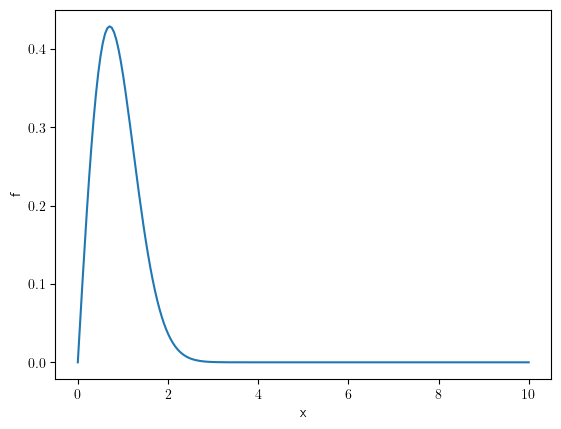

In [47]:
x_fine = np.linspace(0, 10, 200)
f_fine = f(x_fine)

plt.plot(x_fine, f_fine)
plt.xlabel("x")
plt.ylabel("f")

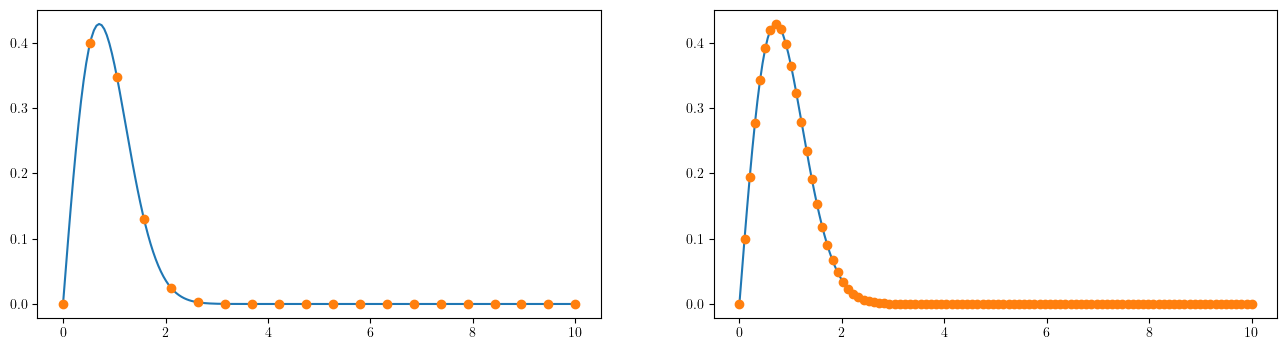

In [48]:
x1, dx1 = np.linspace(start=0, stop=10, num=20, retstep=True)
x2, dx2 = np.linspace(start=0, stop=10, num=100, retstep=True)

f1 = f(x1)
f2 = f(x2)

fig = plt.figure(figsize=(16, 4))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.plot(x_fine, f_fine)
ax2.plot(x_fine, f_fine)
ax1.plot(x1, f1, "o")
ax2.plot(x2, f2, "o")

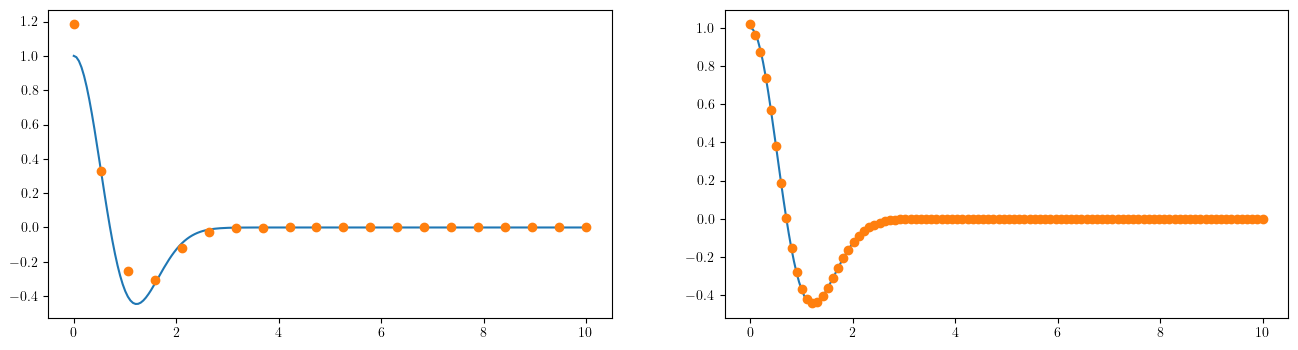

In [49]:
d_dx1 = FinDiff(0, dx1, acc=2)
d_dx2 = FinDiff(0, dx2)

df_dx1 = d_dx1(f1)
df_dx2 = d_dx2(f2)
df_dx_exact = df_dx(x_fine)

fig = plt.figure(figsize=(16, 4))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.plot(x_fine, df_dx_exact)
ax2.plot(x_fine, df_dx_exact)
ax1.plot(x1, df_dx1, "o")
ax2.plot(x2, df_dx2, "o")

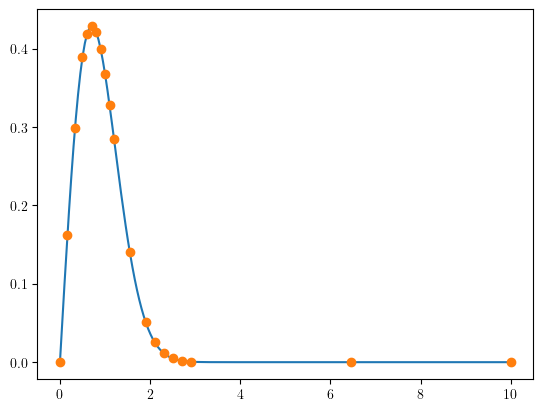

In [50]:
x_nu = np.r_[
    np.linspace(0, 0.5, 3, endpoint=False),
    np.linspace(0.5, 1.2, 7, endpoint=False),
    np.linspace(1.2, 1.9, 2, endpoint=False),
    np.linspace(1.9, 2.9, 5, endpoint=False),
    np.linspace(2.9, 10, 3),
]
f_nu = f(x_nu)
plt.plot(x_fine, f_fine)
plt.plot(x_nu, f_nu, "o")

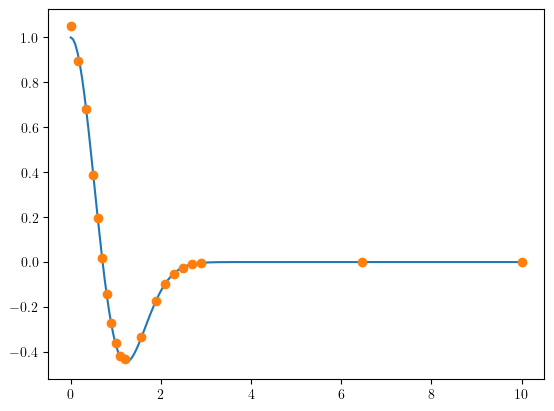

In [51]:
d_dx = FinDiff(0, x_nu, acc=2)
df_dx_nu = d_dx(f_nu)

plt.plot(x_fine, df_dx_exact)
plt.plot(x_nu, df_dx_nu, "o")

In [52]:
def switch_off_xy_axis(ax):
    ax.xaxis.set_ticks([])
    ax.yaxis.set_ticks([])
    for direction in ["bottom", "top", "left", "right"]:
        ax.spines[direction].set_visible(False)


def plot_grid(ax, offsets, color, markersize=30):
    offsets = np.array(offsets)
    ax.plot(offsets[:, 0], offsets[:, 1], "o", color=color, markersize=markersize)


def plot_offsets(ax, offsets, vshift=-0.15):
    for x, y in offsets:
        ax.text(
            x,
            y + vshift,
            "$ " + str((x, y)) + " $",
            verticalalignment="top",
            horizontalalignment="center",
        )


def plot_coefficients(ax, offsets, coefs):
    if not coefs:
        return
    for (x, y), c in zip(offsets, coefs):
        ax.text(
            x,
            y,
            c,
            color="white",
            verticalalignment="center",
            horizontalalignment="center",
        )

In [53]:
def plot_axes(
    ax,
    stencil,
    coeffs,
    grid_kernel=[-1, 0, 1],
    with_coefs=True,
    with_offsets=True,
    markersize=30,
):
    from itertools import product

    switch_off_xy_axis(ax)
    plot_grid(
        ax, list(product(grid_kernel, repeat=2)), color="#C0C0C0", markersize=markersize
    )
    plot_grid(ax, stencil, color="C0", markersize=markersize)
    if with_offsets:
        plot_offsets(ax, stencil)
    if with_coefs:
        plot_coefficients(ax, stencil, coeffs)

In [54]:
laplace = FinDiff(0, 1, 2) + FinDiff(1, 1, 2)

In [55]:
stencil_set = laplace.stencil((5, 5))

In [56]:
stencil = stencil_set.data[("C", "C")]

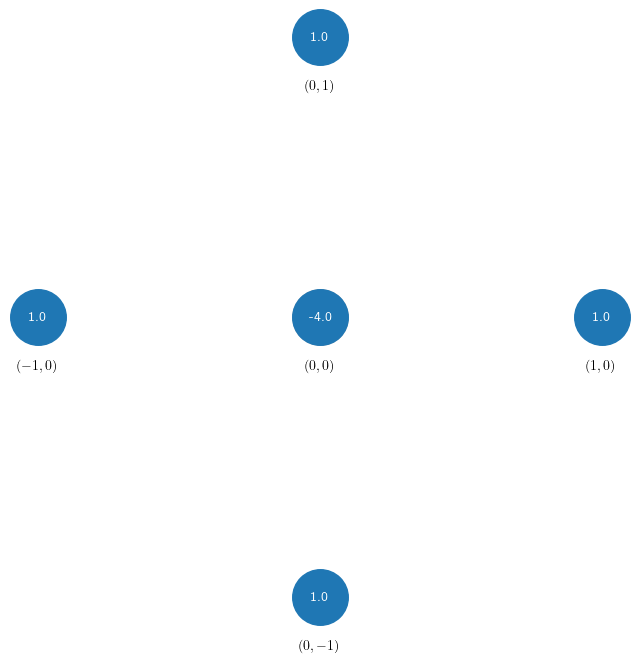

In [57]:
fig, ax = plt.subplots(figsize=(8, 8))
plot_axes(
    ax,
    stencil=list(stencil.keys()),
    grid_kernel=[0],
    coeffs=list(stencil.values()),
    markersize=40,
)

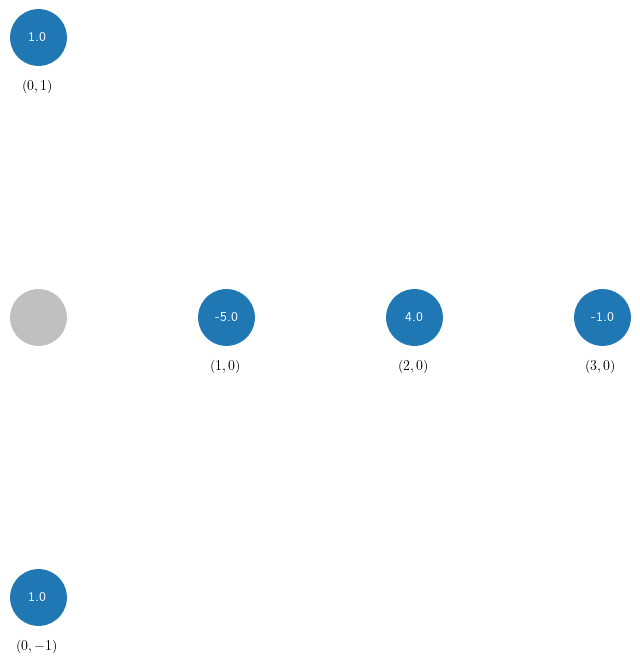

In [58]:
stencil = stencil_set.data[("L", "C")]
fig, ax = plt.subplots(figsize=(8, 8))
plot_axes(
    ax,
    stencil=list(stencil.keys()),
    grid_kernel=[0],
    coeffs=list(stencil.values()),
    markersize=40,
)

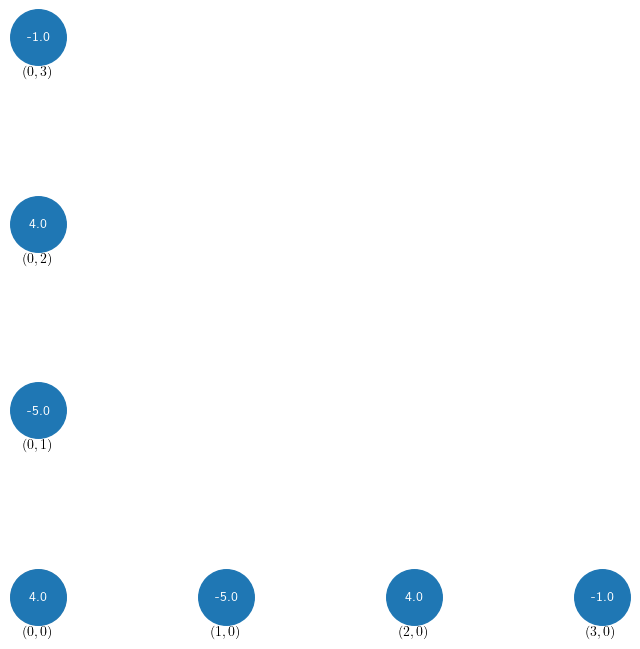

In [59]:
stencil = stencil_set.data[("L", "L")]
fig, ax = plt.subplots(figsize=(8, 8))
plot_axes(
    ax,
    stencil=list(stencil.keys()),
    grid_kernel=[0],
    coeffs=list(stencil.values()),
    markersize=40,
)

In [60]:
def plot_stencil(ax, grid, stencil, labels, stubs=[-0.5, 0.5], coefs=None, no_x=False):
    markersize = 16
    downshift = -0.01

    if coefs:
        markersize = 24
        downshift = -0.02

    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)

    ax.set_ylim(-0.1, 0.1)

    for direction in ["bottom", "top", "left", "right"]:
        ax.spines[direction].set_visible(False)

    ax.add_line(
        Line2D([min(grid) + stubs[0], max(grid) + stubs[1]], [0, 0], color="black")
    )
    ax.plot(grid, [0] * len(grid), "o", color="#C0C0C0", markersize=markersize)
    ax.plot(stencil, [0] * len(stencil), "o", color="C0", markersize=markersize)

    if coefs:
        for x, coef in zip(stencil, coefs):
            ax.text(
                x,
                0,
                "$%s$" % coef,
                fontsize="x-small",
                horizontalalignment="center",
                verticalalignment="center",
                color="white",
            )

    for x, label in zip(grid, labels):
        if no_x:
            txt = "$ " + label + " $"
        else:
            txt = "$x_{%s}$" % label
        txt = ax.text(
            x,
            downshift,
            txt,
            clip_on=True,
            verticalalignment="top",
            horizontalalignment="center",
        )
        if no_x:
            txt.set_fontsize("x-small")
            txt.set_y(1.5 * downshift)

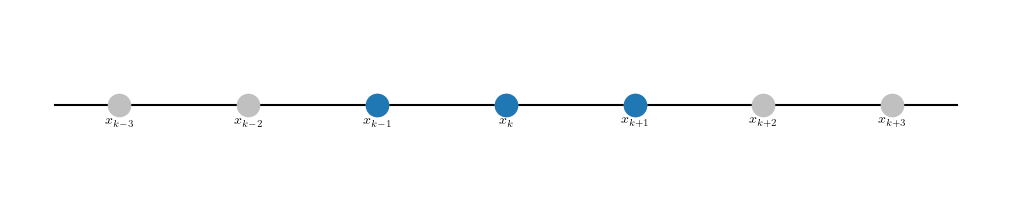

In [61]:
fig, ax = plt.subplots(figsize=(10, 2), layout="constrained")
plot_stencil(
    ax,
    list(range(-3, 4)),
    list(range(-1, 2)),
    labels=["k-3", "k-2", "k-1", "k", "k+1", "k+2", "k+3"],
)

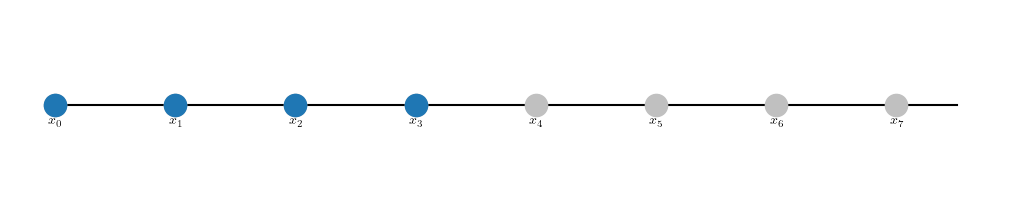

In [62]:
fig, ax = plt.subplots(figsize=(10, 2), layout="constrained")
plot_stencil(
    ax,
    list(range(8)),
    list(range(4)),
    labels=["0", "1", "2", "3", "4", "5", "6", "7"],
    stubs=[0, 0.5],
)

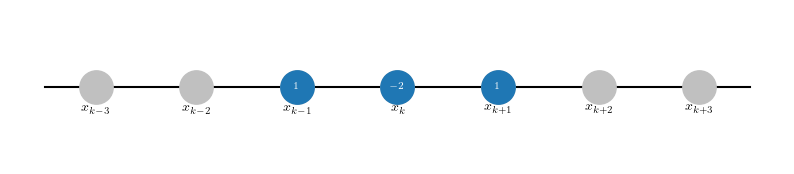

In [63]:
fig, ax = plt.subplots(figsize=(10, 2))
plot_stencil(
    ax,
    list(range(-3, 4)),
    list(range(-1, 2)),
    labels=["k-3", "k-2", "k-1", "k", "k+1", "k+2", "k+3"],
    coefs=[1, -2, 1],
)

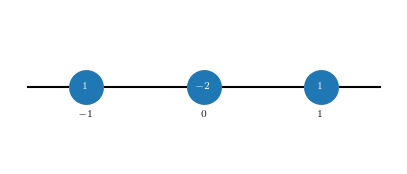

In [64]:
fig, ax = plt.subplots(figsize=(5, 2))
plot_stencil(
    ax,
    list(range(-1, 2)),
    list(range(-1, 2)),
    labels=["-1", "0", "1"],
    coefs=[1, -2, 1],
    no_x=True,
)

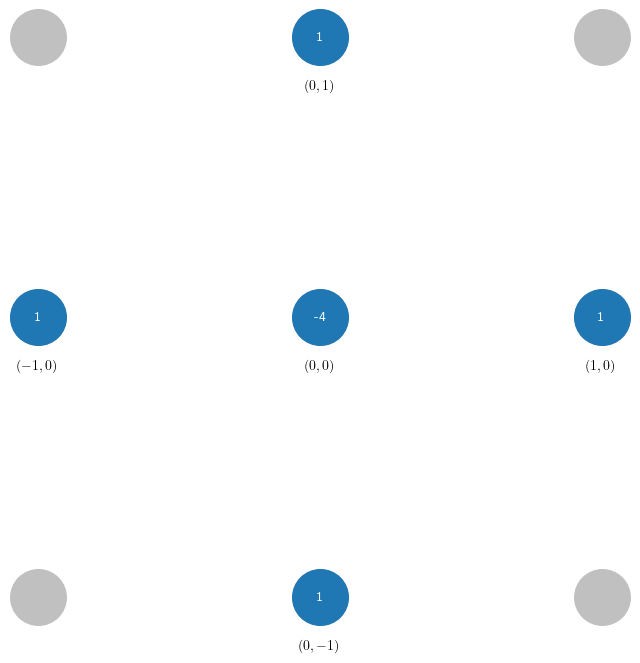

In [65]:
fig, ax = plt.subplots(figsize=(8, 8))
plot_axes(
    ax,
    stencil=[(-1, 0), (0, 0), (1, 0), (0, 1), (0, -1)],
    coeffs=[1, -4, 1, 1, 1],
    markersize=40,
)

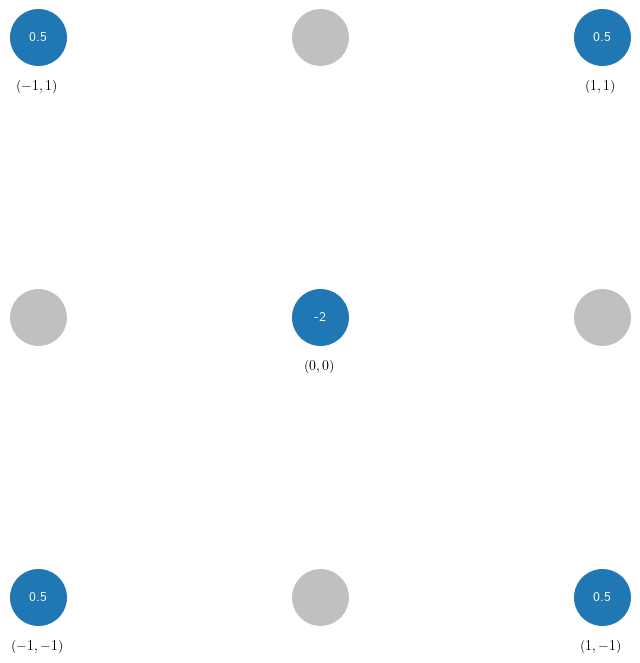

In [66]:
fig, ax = plt.subplots(figsize=(8, 8))
plot_axes(
    ax,
    stencil=[(0, 0), (1, 1), (-1, -1), (1, -1), (-1, 1)],
    coeffs=[-2, 0.5, 0.5, 0.5, 0.5],
    markersize=40,
)